In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np


In [2]:
import os

In [3]:
os.getcwd()

'/Users/celiasalazar/Desktop/Face/fbfakeevents/Conversion/BehaviorMixpanel/Analysis'

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas_gbq

credentials = service_account.Credentials.from_service_account_file(
  '/Users/celiasalazar/Documents/k/KineduDataWarehouse.json',
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id,
)

In [5]:
query= '''
select * from `celtic-music-240111.celia_aux.En_01_12`
where country in('US','GB','CA','AU') and adjust_network in ('Facebook', 'SMARTLY - Facebook', 'Facebook Installs', 'Instagram', 'SMARTLY - Instagram')
'''
df = pandas_gbq.read_gbq(query, project_id=credentials.project_id)



Downloading: 100%|██████████| 88891/88891 [01:00<00:00, 1480.70rows/s]


In [6]:
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [7]:
query= '''
select * from `celtic-music-240111.dbt_Celia_Analytics.fb_event_aOS_en_7thdays`
where mp_country="BR"

'''
#fb_event_aOS_en_2days

In [ ]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)



In [264]:
raw_data=df

In [265]:
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #impor

In [266]:
raw_data.shape

(88891, 118)

##FT

In [267]:
raw_data

user_id  days_to_convert  days_to_take_FT device adjust_network  \
0      6541347              NaN              NaN   NULL       Facebook   
1      5854002              NaN              NaN   NULL       Facebook   
2      5820975              NaN              NaN   NULL       Facebook   
3      4777298              NaN              NaN   NULL       Facebook   
4      4920867              NaN              NaN   NULL       Facebook   
...        ...              ...              ...    ...            ...   
88886  4846528              NaN              NaN   NULL       Facebook   
88887  4699670              NaN              NaN   NULL       Facebook   
88888  6680948              NaN              NaN   NULL       Facebook   
88889  4875962              NaN              NaN   NULL       Facebook   
88890  6332193              NaN              NaN   NULL       Facebook   

       screen_height  screenwidth android_app_version android_lib_version  \
0             1411.0        720.0              1.32.1               5.8.5   
1             2076.0       1080.0              1.22.1      5.8.4-SNAPSHOT   
2             2265.0       1080.0              1.24.0      5.8.4-SNAPSHOT   
3             2042.0       1080.0              1.25.2      5.8.4-SNAPSHOT   
4             2076.0       1080.0              1.20.2               5.7.0   
...              ...          ...                 ...                 ...   
88886         2076.0       1080.0              1.20.2               5.7.0   
88887         2076.0       1080.0              1.32.1               5.8.5   
88888         2037.0       1080.0              1.35.0               5.8.5   
88889         2020.0       1080.0              1.19.1               5.6.8   
88890         2042.0       1080.0              1.27.2               5.8.4   

       initial_assessment_completed  ... S_MilestonesHome  \
0                                 1  ...                0   
1                                 1  ...                0   
2                                 1  ...                0   
3                                 1  ...                1   
4                                 1  ...               65   
...                             ...  ...              ...   
88886                             1  ...                1   
88887                             1  ...                0   
88888                             1  ...                0   
88889                             1  ...                0   
88890                             1  ...                5   

      SkillsCardNotPersonalize SkillsViewAllSkills  S_PromoCode  \
0                            0                   0            0   
1                            0                   0            0   
2                            0                   0            0   
3                            0                   0            0   
4                            0                   4            0   
...                        ...                 ...          ...   
88886                        0                   0            0   
88887                        0                   0            0   
88888                        0                   0            0   
88889                        0                   0            0   
88890                        0                   0            0   

       PromoCodeRedeem S_FeedHome InviteClassrooms shown  clicked  dismissed  
0                    0          0                0     7        0          0  
1                    0          0                0     0        0          0  
2                    0          0                0     1        0          0  
3                    0          0                0     0        0          0  
4                    0          0                0     5        0          0  
...                ...        ...              ...   ...      ...        ...  
88886                0          0                0     0        0          0  
88887                0 

In [268]:
CFt=raw_data[raw_data.y=="Premium"].days_to_take_FT.value_counts() #Ft_Converted

<AxesSubplot:>

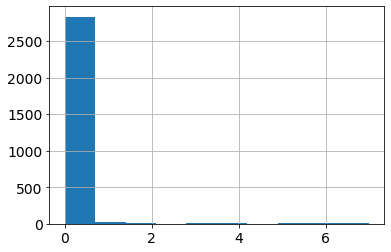

In [269]:
raw_data[raw_data.days_to_take_FT<=7].days_to_take_FT.hist()

In [270]:
didCFt= raw_data[raw_data.y=="Freemium"].days_to_take_FT.value_counts() 
# FT_didn't-Converted
print(didCFt)

0.0      1499
1.0        12
2.0         4
3.0         4
8.0         4
         ... 
159.0       1
206.0       1
164.0       1
42.0        1
23.0        1
Name: days_to_take_FT, Length: 87, dtype: int64


In [271]:
1333/(1499+1333)  #Percentage of people who take Ft and convert

0.4706920903954802

In [272]:
CFt

0.0      1333
1.0        14
2.0        13
6.0         8
3.0         6
         ... 
32.0        1
96.0        1
41.0        1
192.0       1
159.0       1
Name: days_to_take_FT, Length: 84, dtype: int64

# Days_to_convert

In [273]:
raw_data.y.value_counts()

Freemium    85735
Premium      3156
Name: y, dtype: int64

In [274]:
ConvD=raw_data[raw_data.y=="Premium"].days_to_convert.value_counts() #Converted
print(ConvD)

7.0      1129
0.0       452
8.0       104
1.0        88
3.0        79
         ... 
186.0       1
150.0       1
149.0       1
215.0       1
103.0       1
Name: days_to_convert, Length: 208, dtype: int64


In [275]:
raw_data[(raw_data.FreeTrialStart==0) & (raw_data.days_to_convert<=10)].days_to_convert.value_counts() #Converted

0.0     448
1.0      87
3.0      73
2.0      62
5.0      46
4.0      41
7.0      37
6.0      30
8.0      27
10.0     23
9.0      21
Name: days_to_convert, dtype: int64

<AxesSubplot:>

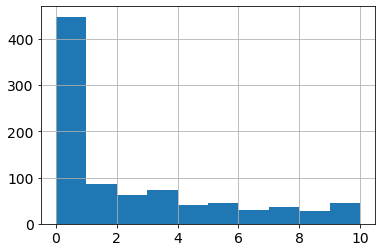

In [276]:
raw_data.loc[(raw_data.FreeTrialStart==0) & (raw_data.days_to_convert<=10)].days_to_convert.hist()

<AxesSubplot:>

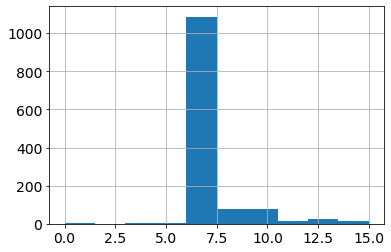

In [277]:
raw_data.loc[(raw_data.FreeTrialStart==1) & (raw_data.days_to_convert<=15)].days_to_convert.hist()

<AxesSubplot:>

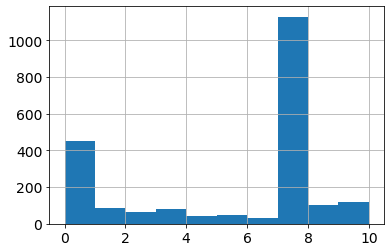

In [278]:
raw_data[raw_data.days_to_convert<=10].days_to_convert.hist()

In [279]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [280]:
gf=raw_data[columns]

In [281]:
print(gf['y'].value_counts())
Premium_count = len(gf[gf['y']=="Premium"])
Freemium_count  = len(gf[gf['y']=="Freemium"])
pct_of_Premium = Premium_count/(Premium_count+Freemium_count)
print("Percentage of Premium", pct_of_Premium*100)
pct_of_Freemium= Freemium_count/(Premium_count+Freemium_count)
print("Percentage of Freemium", pct_of_Freemium *100)

Freemium    85735
Premium      3156
Name: y, dtype: int64
Percentage of Premium 3.5504156776276568
Percentage of Freemium 96.44958432237235


In [282]:
p_mean= gf.groupby('y').mean().T

In [283]:
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()


In [284]:
p_mean['Freemium'].values

array([5.63063577e+06, 4.97563946e+00, 2.01080918e+03, 1.05443623e+03,
       9.43488657e-01, 1.91520383e-02, 1.15495422e-01, 2.97232169e+00,
       1.16638479e-05, 3.29970257e-02, 4.76083280e-01, 1.91246282e+00,
       1.14620633e-01, 8.31923952e-01, 1.88954336e-03, 1.00422231e+00,
       1.00268269e+00, 1.15840672e+00, 1.14305709e-02, 1.02840147e-01,
       5.07808946e-01, 6.90266519e-01, 9.19461130e-01, 1.60358080e+00,
       1.07505686e-01, 7.88254505e-01, 4.22371260e-01, 7.45086604e-02,
       4.05490173e+00, 3.67901091e-01, 3.77360471e-01, 9.71015338e-02,
       7.71096985e-02, 6.10835715e-02, 5.26389456e-02, 1.88593923e+00,
       1.15355456e-02, 6.04187321e-03, 1.83005774e-01, 1.13244299e+00,
       2.17052546e-01, 4.53758675e-01, 1.99428471e-01, 1.98285414e-04,
       1.17459614e+00, 6.85834257e-03, 5.23706771e-03, 5.66396454e-02,
       9.13279291e-03, 1.78730973e+00, 2.21846387e-02, 8.99072724e-01,
       1.78806788e-02, 1.86621566e-03, 5.28372310e-03, 2.03032600e-01,
      

In [285]:
p_mean['Premium'].values

array([5.80258895e+06, 5.15179760e+00, 2.06667237e+03, 1.08631115e+03,
       9.97465146e-01, 4.75918885e-01, 8.75475285e-01, 7.02566540e+00,
       9.50570342e-04, 1.09315589e-01, 8.29847909e-01, 1.93314322e+00,
       1.27693283e-01, 8.44423321e-01, 6.97084918e-03, 1.00506971e+00,
       1.00411914e+00, 1.22718631e+00, 1.61596958e-02, 1.16286439e-01,
       3.28580482e-01, 1.47338403e+00, 1.00475285e+00, 1.60424588e+00,
       7.88973384e-02, 9.16032953e-01, 3.77693283e-01, 9.22053232e-02,
       6.03992395e+00, 6.78390368e-01, 7.63941698e-01, 1.01394170e-01,
       9.47401774e-02, 7.60456274e-02, 5.54499366e-02, 3.06875792e+00,
       2.34157161e-01, 5.00950570e-01, 2.62198986e+00, 6.58460076e+00,
       8.77376426e-01, 2.34125475e+00, 1.21609632e+00, 3.16856781e-03,
       7.05830165e+00, 3.01013942e-02, 4.62610900e-02, 4.57541191e-01,
       6.33713561e-02, 1.98542459e+00, 6.68567807e-02, 6.92553866e+00,
       4.42648923e-01, 8.23827630e-02, 2.67427123e-01, 2.36248416e+00,
      

In [286]:
p_mean.index

Index(['user_id', 'days_to_take_FT', 'screen_height', 'screenwidth',
       'initial_assessment_completed', 'FT_start', 'Video_Completed',
       'OpenApp', 'LogOut', 'S_DAPNewSkills', 'AB_TEST', 'S_SPHome',
       'S_SPLogin', 'LogIn', 'SPForgotPass', 'SignUp', 'OBCreateUser',
       'S_OBBabyName', 'OBCreateTwins', 'S_OBPremature', 'Paywall_Dismiss',
       'S_Paywall_Soft', 'CreateBaby', 'S_IAIntro', 'IAStraightToActivities',
       'IAStartAssessment', 'IASkipAssessment', 'MasterSkill', 'IAFinishSkill',
       'S_HealthInterest', 'IAFinishAssessment', 'S_IASetReminder',
       'S_IAReminderSet', 'S_IAReminderContinue', 'IAReminder',
       'S_IA_Answer_Skill', 'DAPChangeActivity', 'S_DAPPastPlansPremium',
       'DAPActivityCompleted', 'DAPFullScreenActivity', 'S_DAPMaterials',
       'MilestonesUpdate', 'ArticleView', 'SlideshowView', 'ActivityView',
       'ClickInDAP', 'RateActivityDAP', 'Feedback_RateActivity',
       'Dismiss_Feedback_RateActivity', 'LifeSpent', 'WhatchAd',
  

In [287]:
numerics=list(p_mean.index)
numerics

['user_id',
 'days_to_take_FT',
 'screen_height',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'CreateBaby',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'IAFinishAssessment',
 'S_IASetReminder',
 'S_IAReminderSet',
 'S_IAReminderContinue',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'DAPFullScreenActivity',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'FreeTrialStart',
 'NPSS

In [288]:
raw_data.FT_start.value_counts()

0    85747
1     3144
Name: FT_start, dtype: int64

In [289]:
FT=raw_data[(raw_data.FT_start==1) & (raw_data.days_to_take_FT<1) &((raw_data.days_to_convert<=8) |(raw_data.days_to_convert.isnull()))]
#& (raw_data.days_to_take_FT<=1) &((raw_data.days_to_convert<=7) |(raw_data.days_to_convert.isnull()))
FT.describe()

user_id  days_to_convert  days_to_take_FT  screen_height  \
count  2.678000e+03      1179.000000           2678.0    2678.000000   
mean   5.813325e+06         7.011874              0.0    2038.927931   
std    6.023951e+05         0.544952              0.0     359.860049   
min    4.444424e+06         0.000000              0.0     782.000000   
25%    5.587897e+06         7.000000              0.0    2020.000000   
50%    5.833589e+06         7.000000              0.0    2076.000000   
75%    6.269218e+06         7.000000              0.0    2139.000000   
max    6.757846e+06         8.000000              0.0    3120.000000   

       screenwidth  initial_assessment_completed  FT_start  FT_conversion  \
count  2678.000000                        2678.0    2678.0    2678.000000   
mean   1070.338312                           1.0       1.0       0.434279   
std     182.328608                           0.0       0.0       0.495755   
min     480.000000                           1.0       1.0       0.000000   
25%    1080.000000                           1.0       1.0       0.000000   
50%    1080.000000                           1.0       1.0       0.000000   
75%    1080.000000                           1.0       1.0       1.000000   
max    2020.000000                           1.0       1.0       1.000000   

       Video_Completed      OpenApp  ...  S_MilestonesHome  \
count      2678.000000  2678.000000  ...       2678.000000   
mean          0.595594     5.846527  ...          1.583271   
std           1.900694     4.688501  ...          5.931275   
min           0.000000     1.000000  ...          0.000000   
25%           0.000000     3.000000  ...          0.000000   
50%           0.000000     5.000000  ...          0.000000   
75%           0.000000     7.000000  ...          1.000000   
max          33.000000   100.000000  ...        164.000000   

       SkillsCardNotPersonalize  SkillsViewAllSkills  S_PromoCode  \
count                    2678.0          2678.000000  2678.000000   
mean                        0.0             0.396938     0.008588   
std                         0.0             1.944606     0.148209   
min                         0.0             0.000000     0.000000   
25%                         0.0             0.000000     0.000000   
50%                         0.0             0.000000     0.000000   
75%                         0.0             0.000000     0.000000   
max                         0.0            52.000000     4.000000   

       PromoCodeRedeem   S_FeedHome  InviteClassrooms        shown  \
count      2678.000000  2678.000000       2678.000000  2678.000000   
mean          0.013443     0.443241          0.001120     6.297610   
std           0.149105     0.970401          0.033457    14.423912   
min           0.000000     0.000000          0.000000     0.000000   
25%           0.000000     0.000000          0.000000     0.000000   
50%           0.000000     0.000000          0.000000     0.000000   
75%           0.000000     1.000000          0.000000     6.000000   
max           3.000000    13.000000          1.000000   180.000000   

           clicked    dismissed  
count  2678.000000  2678.000000  
mean      0.123600     0.159447  
std       0.444149     0.789574  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       7.000000    26.000000  

[8 rows x 108 columns]

In [290]:
FT.y.value_counts()

Freemium    1499
Premium     1179
Name: y, dtype: int64

In [291]:
NFT=raw_data[(raw_data.FT_start==0) & ((raw_data.days_to_convert<1) |(raw_data.days_to_convert.isnull()))]
NFT.describe()

user_id  days_to_convert  days_to_take_FT  screen_height  \
count  8.454100e+04            448.0              0.0   84540.000000   
mean   5.629190e+06              0.0              NaN    2011.266477   
std    6.844086e+05              0.0              NaN     364.049348   
min    4.444127e+06              0.0              NaN     782.000000   
25%    4.887580e+06              0.0              NaN    2020.000000   
50%    5.747474e+06              0.0              NaN    2076.000000   
75%    6.175698e+06              0.0              NaN    2128.000000   
max    6.757852e+06              0.0              NaN    3120.000000   

        screenwidth  initial_assessment_completed  FT_start  FT_conversion  \
count  84540.000000                  84541.000000   84541.0        84541.0   
mean    1054.662006                      0.942750       0.0            0.0   
std      181.330196                      0.232322       0.0            0.0   
min      414.000000                      0.000000       0.0            0.0   
25%     1080.000000                      1.000000       0.0            0.0   
50%     1080.000000                      1.000000       0.0            0.0   
75%     1080.000000                      1.000000       0.0            0.0   
max     2892.000000                      1.000000       0.0            0.0   

       Video_Completed       OpenApp  ...  S_MilestonesHome  \
count     84541.000000  84541.000000  ...      84541.000000   
mean          0.118061      2.973374  ...          0.974155   
std           0.551453      2.196819  ...          3.819995   
min           0.000000      0.000000  ...          0.000000   
25%           0.000000      2.000000  ...          0.000000   
50%           0.000000      2.000000  ...          0.000000   
75%           0.000000      4.000000  ...          0.000000   
max          29.000000    133.000000  ...        124.000000   

       SkillsCardNotPersonalize  SkillsViewAllSkills   S_PromoCode  \
count                   84541.0         84541.000000  84541.000000   
mean                        0.0             0.233425      0.012112   
std                         0.0             1.147784      0.165858   
min                         0.0             0.000000      0.000000   
25%                         0.0             0.000000      0.000000   
50%                         0.0             0.000000      0.000000   
75%                         0.0             0.000000      0.000000   
max                         0.0            28.000000     12.000000   

       PromoCodeRedeem    S_FeedHome  InviteClassrooms         shown  \
count     84541.000000  84541.000000      84541.000000  84541.000000   
mean          0.003951      0.095125          0.000260      2.725056   
std           0.101484      0.401072          0.018197      5.096545   
min           0.000000      0.000000          0.000000      0.000000   
25%           0.000000      0.000000          0.000000      0.000000   
50%           0.000000      0.000000          0.000000      1.000000   
75%           0.000000      0.000000          0.000000      3.000000   
max          10.000000     12.000000          2.000000    153.000000   

            clicked     dismissed  
count  84541.000000  84541.000000  
mean       0.039070      0.109627  
std        0.233212      0.439126  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        9.000000     11.000000  

[8 rows x 108 columns]

In [292]:
NFT.FT_start.value_counts()

0    84541
Name: FT_start, dtype: int64

In [293]:
numerics.append('days_to_convert')
numerics.append('y')

# Without FT

In [294]:
#Without FT

In [295]:
#numerics= FT[numerics]
N= NFT[numerics]

In [296]:
cleanup_nums = {"y":{'Premium':1, 'Freemium':0}}
N.replace(cleanup_nums, inplace=True)
correlation = N.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [297]:
correlation=correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool)) # convert lower triangle of values to NaNs
correlations= correlation.stack().reset_index()
correlations.columns=['V1','V2','Corr']
correlations.loc[correlations['Corr']>.60].reset_index() #variables to remove given the positive correlation to avoid collinearity

index                            V1                    V2      Corr
0      84                 screen_height           screenwidth  0.958865
1     265  initial_assessment_completed            CreateBaby  0.730172
2     374               Video_Completed   VideoPlayerActivity  0.647996
3    1014                        SignUp          OBCreateUser  0.662076
4    1917              S_HealthInterest    IAFinishAssessment  0.862299
5    2085               S_IAReminderSet  S_IAReminderContinue  0.830863
6    2086               S_IAReminderSet            IAReminder  0.933026
7    2139          S_IAReminderContinue            IAReminder  0.805190
8    2446         DAPFullScreenActivity          ActivityView  0.982931
9    3109              S_MenuFamilyHome        S_MenuEditBaby  0.703189
10   3436                    S_CATSkill      S_CollectionView  0.996000
11   3453                     CATSearch    S_SearchEmptyState  0.675341

In [298]:
correlations.loc[correlations['Corr']<-.60].reset_index() #variables to remove given the negative correlation to avoid collinearity



Empty DataFrame
Columns: [index, V1, V2, Corr]
Index: []

In [299]:
to_keep = list(N.columns)
not_keep=['screen_height','initial_assessment_completed','VideoPlayerActivity','SignUp','S_HealthInterest','S_IAReminderContinue','IAReminder','DAPFullScreenActivity','S_MenuEditBaby','S_CATSkill','S_SearchEmptyState','days_to_convert']
for element in not_keep:
    if element in to_keep:
        to_keep.remove(element)


In [300]:
N1=N[to_keep]


In [301]:
num=list(N1.describe().columns)
num.remove('y')
num.remove('user_id')
num.remove( 'days_to_convert' )

ValueError: list.remove(x): x not in list

In [ ]:
#Prueba Xi   --Variables Númericas
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
nums=N1[num]
nums=nums.fillna(0)

In [ ]:
y= N1['y']
X = scale(nums)
bestfeatures = SelectKBest(score_func=chi2, k="all")
X= abs(X)
y
fit= bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(nums.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score').reset_index(drop=True))

In [ ]:
feat= featureScores.nlargest(40,'Score').Feature
feat=feat.tolist()
feat

# With FT


In [ ]:
N= FT[numerics]


In [302]:
cleanup_nums = {"y":{'Premium':1, 'Freemium':0}}
N.replace(cleanup_nums, inplace=True)
correlation = N.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [303]:
correlation=correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool)) # convert lower triangle of values to NaNs
correlations= correlation.stack().reset_index()
correlations.columns=['V1','V2','Corr']
correlations.loc[correlations['Corr']>.60].reset_index() #variables to remove given the positive correlation to avoid collinearity

index                            V1                    V2      Corr
0      84                 screen_height           screenwidth  0.958865
1     265  initial_assessment_completed            CreateBaby  0.730172
2     374               Video_Completed   VideoPlayerActivity  0.647996
3    1014                        SignUp          OBCreateUser  0.662076
4    1917              S_HealthInterest    IAFinishAssessment  0.862299
5    2085               S_IAReminderSet  S_IAReminderContinue  0.830863
6    2086               S_IAReminderSet            IAReminder  0.933026
7    2139          S_IAReminderContinue            IAReminder  0.805190
8    2446         DAPFullScreenActivity          ActivityView  0.982931
9    3109              S_MenuFamilyHome        S_MenuEditBaby  0.703189
10   3436                    S_CATSkill      S_CollectionView  0.996000
11   3453                     CATSearch    S_SearchEmptyState  0.675341

In [304]:
correlations.loc[correlations['Corr']<-.60].reset_index() #variables to remove given the negative correlation to avoid collinearity



Empty DataFrame
Columns: [index, V1, V2, Corr]
Index: []

In [305]:
to_keep = list(N.columns)
not_keep=['screen_height','SignUp','S_IAIntro','S_HealthInterest','IAStartAssessment','S_IAReminderContinue','IAReminder','DAPActivityCompleted','DAPFullScreenActivity','ActivityView','VideoPlayerActivity','S_MilestonesHome','S_MenuEditBaby','S_MenuFamilyProfile','MenuHelp','MenuMemberStats','MenuFamilyInvite','clicked','S_CollectionView','ViewAllCollections','CATSearch',]
for element in not_keep:
    if element in to_keep:
        to_keep.remove(element)

In [306]:
N1=N[to_keep]

In [307]:
num=list(N1.describe().columns)
num.remove('y')
num.remove('user_id')
num.remove( 'days_to_convert' )

In [308]:
#Prueba Xi   --Variables Númericas
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [309]:
nums=N1[num]
nums=nums.fillna(0)

In [310]:
nums.describe()

days_to_take_FT   screenwidth  initial_assessment_completed  FT_start  \
count          84541.0  84541.000000                  84541.000000   84541.0   
mean               0.0   1054.649531                      0.942750       0.0   
std                0.0    181.365399                      0.232322       0.0   
min                0.0      0.000000                      0.000000       0.0   
25%                0.0   1080.000000                      1.000000       0.0   
50%                0.0   1080.000000                      1.000000       0.0   
75%                0.0   1080.000000                      1.000000       0.0   
max                0.0   2892.000000                      1.000000       0.0   

       Video_Completed       OpenApp        LogOut  S_DAPNewSkills  \
count     84541.000000  84541.000000  84541.000000    84541.000000   
mean          0.118061      2.973374      0.000012        0.033049   
std           0.551453      2.196819      0.003439        0.197082   
min           0.000000      0.000000      0.000000        0.000000   
25%           0.000000      2.000000      0.000000        0.000000   
50%           0.000000      2.000000      0.000000        0.000000   
75%           0.000000      4.000000      0.000000        0.000000   
max          29.000000    133.000000      1.000000        5.000000   

            AB_TEST      S_SPHome  ...  S_CATViewSkill  S_SearchEmptyState  \
count  84541.000000  84541.000000  ...    84541.000000        84541.000000   
mean       0.482902      1.913131  ...        0.004306            0.000674   
std        1.219143      0.924971  ...        0.148107            0.035236   
min        0.000000      0.000000  ...        0.000000            0.000000   
25%        0.000000      2.000000  ...        0.000000            0.000000   
50%        0.000000      2.000000  ...        0.000000            0.000000   
75%        0.000000      2.000000  ...        0.000000            0.000000   
max       68.000000    127.000000  ...       28.000000            4.000000   

        ResetSearch  SkillsViewAllSkills   S_PromoCode  PromoCodeRedeem  \
count  84541.000000         84541.000000  84541.000000     84541.000000   
mean       0.000106             0.233425      0.012112         0.003951   
std        0.010317             1.147784      0.165858         0.101484   
min        0.000000             0.000000      0.000000         0.000000   
25%        0.000000             0.000000      0.000000         0.000000   
50%        0.000000             0.000000      0.000000         0.000000   
75%        0.000000             0.000000      0.000000         0.000000   
max        1.000000            28.000000     12.000000        10.000000   

         S_FeedHome  InviteClassrooms         shown     dismissed  
count  84541.000000      84541.000000  84541.000000  84541.000000  
mean       0.095125          0.000260      2.725056      0.109627  
std        0.401072          0.018197      5.096545      0.439126  
min        0.000000          0.000000      0.000000      0.000000  
25%        0.000000          0.000000      0.000000      0.000000  
50%        0.000000          0.000000      1.000000      0.000000  
75%        0.000000          0.000000      3.000000      0.000000  
max       12.000000          2.000000    153.000000     11.000000  

[8 rows x 64 columns]

In [311]:
y

8        0
17       0
24       0
52       0
65       0
        ..
88444    0
88679    0
88747    0
88773    0
88831    0
Name: y, Length: 1503, dtype: int64

In [312]:
y= N1['y']
X = scale(nums)
bestfeatures = SelectKBest(score_func=chi2, k="all")
X= abs(X)
y
fit= bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(nums.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score').reset_index(drop=True))

                          Feature          Score
0           S_DAPPastPlansPremium  170227.994796
1                     S_CATHome_P   91952.635583
2                      S_NPSScore   71151.299503
3                       NPSSubmit   36911.322582
4                          LogOut   27288.061416
5               DAPChangeActivity   23153.317089
6                  S_ProgressHome   19182.156829
7                 Video_Completed    8083.911326
8               MenuFamilyDefault    6318.498412
9                           shown    6067.801822
10                 S_CATViewSkill    5518.937317
11                        OpenApp    5259.631222
12                PromoCodeRedeem    5188.861262
13                 FreeTrialStart    5139.972024
14               S_MenuFamilyHome    5043.181174
15                TAPCallToAction    4519.599169
16                     S_FeedHome    4428.980755
17              S_MenuUserProfile    4308.308963
18          Feedback_RateActivity    4169.277076
19                  

In [313]:
feat= featureScores.nlargest(39,'Score').Feature
feat=feat.tolist()
feat

['S_DAPPastPlansPremium',
 'S_CATHome_P',
 'S_NPSScore',
 'NPSSubmit',
 'LogOut',
 'DAPChangeActivity',
 'S_ProgressHome',
 'Video_Completed',
 'MenuFamilyDefault',
 'shown',
 'S_CATViewSkill',
 'OpenApp',
 'PromoCodeRedeem',
 'FreeTrialStart',
 'S_MenuFamilyHome',
 'TAPCallToAction',
 'S_FeedHome',
 'S_MenuUserProfile',
 'Feedback_RateActivity',
 'ArticleView',
 'MilestonesUpdate',
 'S_CATSkill',
 'S_PromoCode',
 'S_DAPMaterials',
 'Dismiss_Feedback_RateActivity',
 'RateActivityDAP',
 'S_SearchEmptyState',
 'SkillsViewAllSkills',
 'SPForgotPass',
 'ClickInDAP',
 'S_DAPNewSkills',
 'WhatchAd',
 'SlideshowView',
 'dismissed',
 'InviteClassrooms',
 'RestorePurchase',
 'S_IA_Answer_Skill',
 'S_PremiumProcess',
 'AB_TEST']

In [152]:
feat= featureScores.nlargest(24,'Score').Feature
feat=feat.tolist()
feat

['NPSSubmit',
 'S_NPSScore',
 'days_to_take_FT',
 'shown',
 'ResetSearch',
 'S_DAPPastPlansPremium',
 'Feedback_RateActivity',
 'Video_Completed',
 'MilestonesUpdate',
 'S_ProgressHome',
 'OpenApp',
 'FreeTrialStart',
 'S_DAPNewSkills',
 'WhatchAd',
 'S_SearchEmptyState',
 'RestorePurchase',
 'ArticleView',
 'RateActivityDAP',
 'S_DAPMaterials',
 'SkillsViewAllSkills',
 'S_PromoCode',
 'InviteClassrooms',
 'LogOut',
 'DAPChangeActivity']